# Basis, Vector Spaces, and Linear Independence

## A Complete Guide to the Foundation of Linear Algebra

This notebook explores the fundamental building blocks of linear algebra that form the foundation for machine learning, data analysis, and many mathematical applications.

### What You'll Learn:

1. **Vector Spaces** - The mathematical framework that defines our "universe" of vectors
2. **Linear Independence** - When vectors provide unique information vs. redundant information  
3. **Basis** - The minimal set of vectors that completely describes a space
4. **Span** - All the points we can reach using linear combinations
5. **Dimensionality** - How to measure the "size" of a vector space
6. **Practical Applications** - How these concepts appear in machine learning

### Why This Matters:

Understanding these concepts is essential for:
- **Principal Component Analysis (PCA)** - Finding the most important directions in data
- **Dimensionality Reduction** - Reducing complexity while preserving information
- **Solving Linear Systems** - Understanding when solutions exist and are unique
- **Feature Engineering** - Creating meaningful representations of data
- **Neural Networks** - Understanding how layers transform data

Let's dive into these fundamental concepts with visual examples and hands-on code!


In [4]:
# Import necessary libraries for vector operations and visualizations
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Set up matplotlib for high-quality plots
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 10


# Utility functions for our demonstrations
def plot_vectors(vectors, labels=None, colors=None, title="Vector Plot", figsize=(8, 6)):
    """
    Plot multiple vectors with customizable labels and colors.
    
    Args:
        vectors: List of numpy arrays representing vectors
        labels: List of labels for each vector
        colors: List of colors for each vector  
        title: Plot title
        figsize: Figure size tuple
    """
    plt.figure(figsize=figsize)
    ax = plt.gca()
    
    if labels is None:
        labels = [f'v{i+1}' for i in range(len(vectors))]
    if colors is None:
        colors = plt.cm.tab10(np.linspace(0, 1, len(vectors)))
    
    # Plot each vector
    for i, (vector, label, color) in enumerate(zip(vectors, labels, colors)):
        ax.quiver(0, 0, vector[0], vector[1], 
                 angles='xy', scale_units='xy', scale=1,
                 color=color, width=0.005, label=label, linewidth=2)
    
    # Set up the plot
    max_coord = max([max(abs(v)) for v in vectors]) * 1.2
    ax.set_xlim(-max_coord, max_coord)
    ax.set_ylim(-max_coord, max_coord)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.axhline(0, color='black', linewidth=0.8)
    ax.axvline(0, color='black', linewidth=0.8)
    ax.legend()
    ax.set_title(title, fontweight='bold')
    plt.show()

def check_linear_independence(vectors, tolerance=1e-10):
    """
    Check if a set of vectors is linearly independent.
    
    Args:
        vectors: List of numpy arrays
        tolerance: Numerical tolerance for rank calculation
    
    Returns:
        bool: True if vectors are linearly independent
        dict: Additional information about the analysis
    """
    # Stack vectors as columns of a matrix
    matrix = np.column_stack(vectors)
    
    # Calculate rank
    rank = np.linalg.matrix_rank(matrix, tol=tolerance)
    n_vectors = len(vectors)
    dimension = vectors[0].shape[0]
    
    # Determine independence
    is_independent = (rank == n_vectors)
    
    # Additional analysis
    info = {
        'rank': rank,
        'n_vectors': n_vectors,
        'dimension': dimension,
        'is_independent': is_independent,
        'spans_full_space': (rank == dimension),
        'matrix': matrix
    }
    
    return is_independent, info

print("✅ Utility functions defined:")
print("  - plot_vectors(): Enhanced vector plotting")
print("  - check_linear_independence(): Comprehensive independence analysis")


✅ Utility functions defined:
  - plot_vectors(): Enhanced vector plotting
  - check_linear_independence(): Comprehensive independence analysis


---

# 1. Understanding Vector Spaces and Basis

## What is a Vector Space?

A **vector space** is a mathematical structure where we can:
- **Add vectors**: $\vec{u} + \vec{v}$ produces another vector in the space
- **Scale vectors**: $c\vec{u}$ (where $c$ is a scalar) produces another vector in the space
- These operations follow specific rules (associativity, commutativity, etc.)

Think of it as a "universe" where vectors live and can be combined.

## What is a Basis?

A **basis** of a vector space is a set of vectors that satisfies two crucial properties:

### 1. Span the Entire Space
Every vector in the space can be written as a **linear combination** of the basis vectors:
$$\vec{v} = c_1\vec{b}_1 + c_2\vec{b}_2 + ... + c_n\vec{b}_n$$

### 2. Are Linearly Independent  
No basis vector can be written as a combination of the others.

## The Standard Basis in 2D

The most familiar basis in 2D is the **standard basis**:
- $\vec{e}_1 = \begin{bmatrix}1\\0\end{bmatrix}$ (unit vector along x-axis)
- $\vec{e}_2 = \begin{bmatrix}0\\1\end{bmatrix}$ (unit vector along y-axis)

Any 2D vector can be uniquely written as:
$$\vec{v} = a\vec{e}_1 + b\vec{e}_2 = \begin{bmatrix}a\\b\end{bmatrix}$$

The coefficients $[a, b]$ are the **coordinates** of $\vec{v}$ in this basis.


=== Standard Basis Demonstration ===
Standard basis vectors:
  e₁ = [1 0]
  e₂ = [0 1]

Linear combination:
  v = 3 × e₁ + 2 × e₂
  v = 3 × [1 0] + 2 × [0 1]
  v = [3 0] + [0 2]
  v = [3 2]


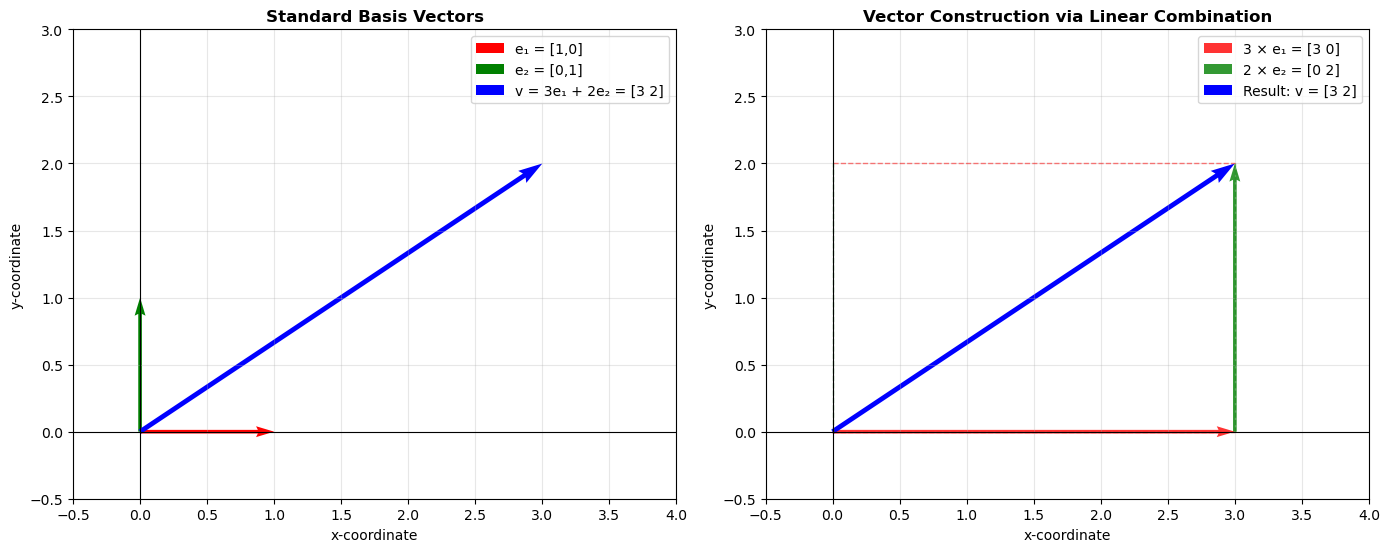


🔍 Verification:
  3 × [1 0] + 2 × [0 1] = [3 2]
  This equals our vector v = [3 2] ✓

💡 Key Insight:
  The coefficients [3, 2] are the coordinates of v in the standard basis!
  Every 2D vector can be uniquely represented this way.


In [6]:
# Demonstrate the standard basis and linear combinations
print("=== Standard Basis Demonstration ===")

# Define standard basis vectors
e1 = np.array([1, 0])  # Standard basis vector along x-axis
e2 = np.array([0, 1])  # Standard basis vector along y-axis

print(f"Standard basis vectors:")
print(f"  e₁ = {e1}")  
print(f"  e₂ = {e2}")

# Create a vector as a linear combination
a, b = 3, 2
v = a * e1 + b * e2

print(f"\nLinear combination:")
print(f"  v = {a} × e₁ + {b} × e₂")
print(f"  v = {a} × {e1} + {b} × {e2}")
print(f"  v = {a * e1} + {b * e2}")
print(f"  v = {v}")

# Create an enhanced visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Left plot: Basis vectors and the resulting vector
ax1.quiver(0, 0, e1[0], e1[1], color='red', angles='xy', scale_units='xy', scale=1, 
           width=0.006, label='e₁ = [1,0]', linewidth=2)
ax1.quiver(0, 0, e2[0], e2[1], color='green', angles='xy', scale_units='xy', scale=1, 
           width=0.006, label='e₂ = [0,1]', linewidth=2)
ax1.quiver(0, 0, v[0], v[1], color='blue', angles='xy', scale_units='xy', scale=1, 
           width=0.008, label=f'v = {a}e₁ + {b}e₂ = {v}', linewidth=3)

# Add grid to show coordinate system
ax1.set_xlim(-0.5, 4)
ax1.set_ylim(-0.5, 3)
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)
ax1.axhline(0, color='black', linewidth=0.8)
ax1.axvline(0, color='black', linewidth=0.8)
ax1.legend(fontsize=10)
ax1.set_title("Standard Basis Vectors", fontweight='bold')
ax1.set_xlabel('x-coordinate')
ax1.set_ylabel('y-coordinate')

# Right plot: Show the construction step by step
ax2.quiver(0, 0, a*e1[0], a*e1[1], color='red', angles='xy', scale_units='xy', scale=1, 
           width=0.006, label=f'{a} × e₁ = {a * e1}', linewidth=2, alpha=0.8)
ax2.quiver(a*e1[0], a*e1[1], b*e2[0], b*e2[1], color='green', angles='xy', scale_units='xy', scale=1, 
           width=0.006, label=f'{b} × e₂ = {b * e2}', linewidth=2, alpha=0.8)
ax2.quiver(0, 0, v[0], v[1], color='blue', angles='xy', scale_units='xy', scale=1, 
           width=0.008, label=f'Result: v = {v}', linewidth=3)

# Draw construction lines
ax2.plot([0, a], [0, 0], 'r--', alpha=0.5, linewidth=1)
ax2.plot([a, v[0]], [0, v[1]], 'g--', alpha=0.5, linewidth=1)
ax2.plot([0, v[0]], [b, v[1]], 'r--', alpha=0.5, linewidth=1)
ax2.plot([0, 0], [0, b], 'g--', alpha=0.5, linewidth=1)

ax2.set_xlim(-0.5, 4)
ax2.set_ylim(-0.5, 3)
ax2.set_aspect('equal')
ax2.grid(True, alpha=0.3)
ax2.axhline(0, color='black', linewidth=0.8)
ax2.axvline(0, color='black', linewidth=0.8)
ax2.legend(fontsize=10)
ax2.set_title("Vector Construction via Linear Combination", fontweight='bold')
ax2.set_xlabel('x-coordinate')
ax2.set_ylabel('y-coordinate')

plt.tight_layout()
plt.show()

# Verify the linear combination
print(f"\n🔍 Verification:")
print(f"  {a} × {e1} + {b} × {e2} = {a * e1 + b * e2}")
print(f"  This equals our vector v = {v} ✓")

print(f"\n💡 Key Insight:")
print(f"  The coefficients [{a}, {b}] are the coordinates of v in the standard basis!")
print(f"  Every 2D vector can be uniquely represented this way.")


---

# 2. Linear Independence: The Foundation of Basis

## Mathematical Definition

A set of vectors $\{\vec{v}_1, \vec{v}_2, ..., \vec{v}_n\}$ is **linearly independent** if the only solution to:

$$c_1\vec{v}_1 + c_2\vec{v}_2 + ... + c_n\vec{v}_n = \vec{0}$$

is $c_1 = c_2 = ... = c_n = 0$ (the trivial solution).

## Intuitive Understanding

**Linearly Independent**: Each vector provides "new information" - no vector can be constructed from the others.

**Linearly Dependent**: At least one vector is redundant - it can be written as a combination of the others.

## Visual Examples

### Example 1: Independent Vectors
- $\vec{b}_1 = \begin{bmatrix}1\\1\end{bmatrix}$
- $\vec{b}_2 = \begin{bmatrix}-1\\1\end{bmatrix}$

These point in different directions. Neither can be written as a scalar multiple of the other.

### Example 2: Dependent Vectors  
- $\vec{c}_1 = \begin{bmatrix}2\\3\end{bmatrix}$
- $\vec{c}_2 = \begin{bmatrix}4\\6\end{bmatrix}$

Here, $\vec{c}_2 = 2\vec{c}_1$, so they're dependent.

## Why Independence Matters

- **For bases**: Independent vectors ensure unique representations
- **For spanning**: Independent vectors provide the most efficient spanning set
- **For solving systems**: Independence determines if solutions are unique


=== Linear Independence Analysis ===
Example 1: Testing Linear Independence
Vectors:
  b₁ = [1 1]
  b₂ = [-1  1]

Independence Analysis:
  Matrix rank: 2
  Number of vectors: 2
  Result: ✅ INDEPENDENT

Example 2: Testing Linear Dependence
Vectors:
  c₁ = [2 3]
  c₂ = [4 6]
  Relationship: c₂ = 2 × c₁

Independence Analysis:
  Matrix rank: 1
  Number of vectors: 2
  Result: ❌ DEPENDENT


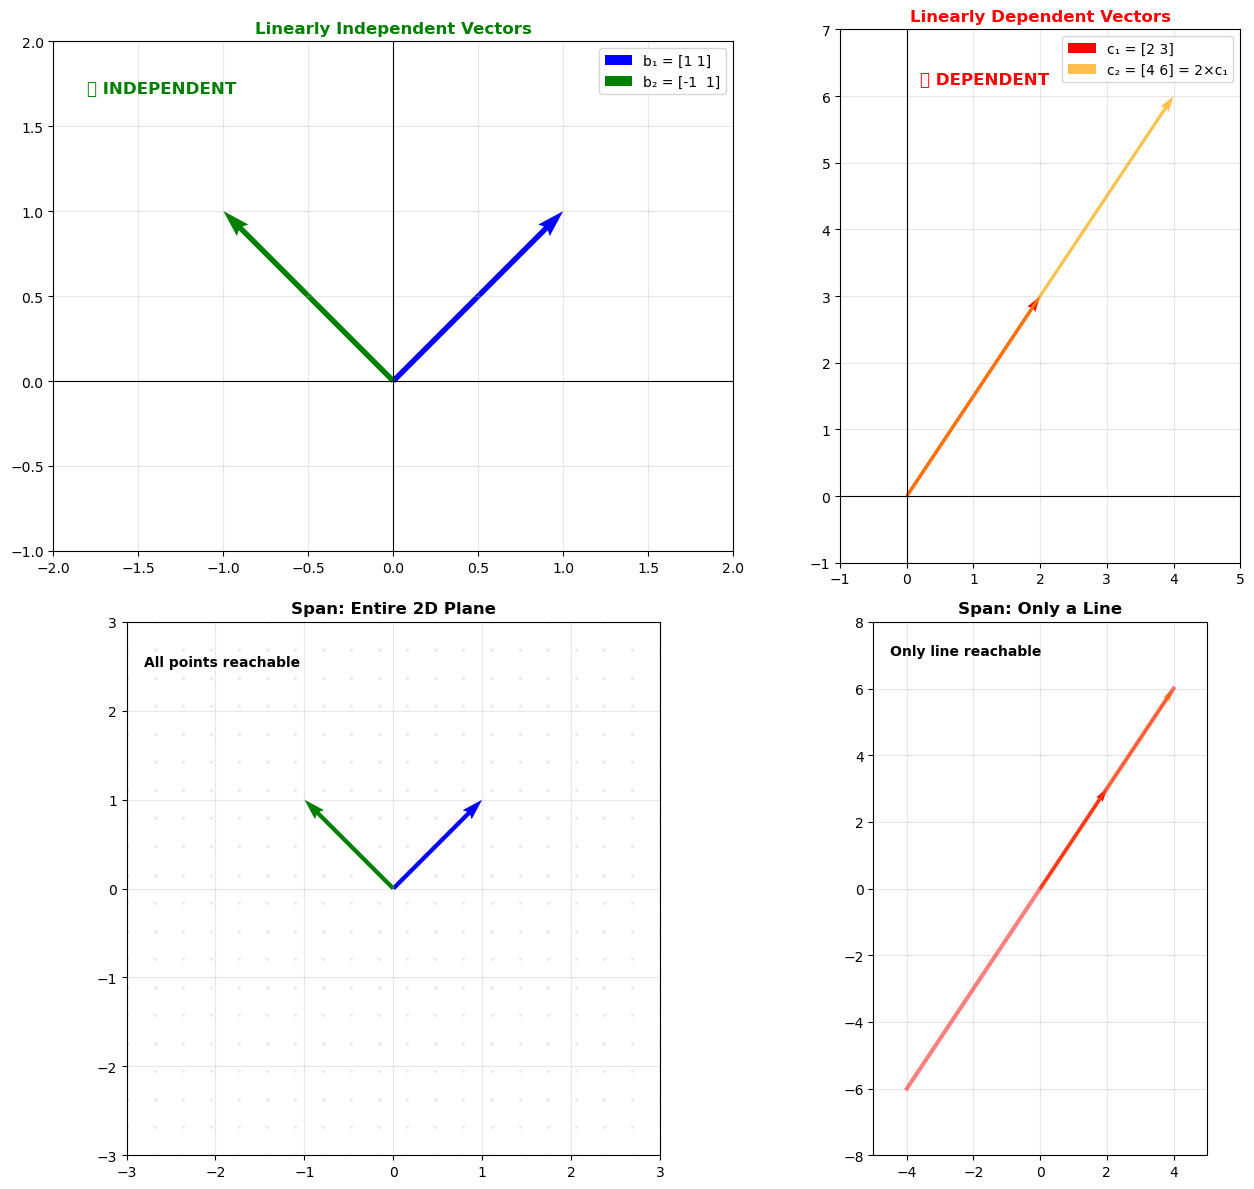


🔍 Mathematical Verification:
Independent vectors [1 1], [-1  1]:
  To solve c₁b₁ + c₂b₂ = 0:
  c₁[1 1] + c₂[-1  1] = [0, 0]
  This gives us: c₁ + (-c₂) = 0 and c₁ + c₂ = 0
  Solution: c₁ = c₂ = 0 (only trivial solution)
  ✅ Therefore, they are independent!

Dependent vectors [2 3], [4 6]:
  Since c₂ = 2×c₁, we have: c₁ - 2c₂ = 0
  This gives us: 1×c₁ + (-2)×c₂ = 0
  Non-trivial solution exists: c₁ = 2, c₂ = 1
  ❌ Therefore, they are dependent!


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Function to check linear independence of given vectors
def check_linear_independence(vectors):
    """ Check linear independence of given vectors using rank calculation.
    
    Args:
        vectors (list of np.array): List of vectors to check.
    
    Returns:
        tuple: (is_independent (bool), info (dict)) where info contains:
            - 'rank' (int): Rank of the matrix formed by the vectors.
            - 'n_vectors' (int): Number of vectors.
    """
    # Create a matrix with the vectors as rows
    matrix = np.array(vectors)
    
    # Calculate the rank of the matrix
    rank = np.linalg.matrix_rank(matrix)
    
    # The vectors are independent if the rank equals the number of vectors
    is_independent = rank == len(vectors)
    
    # Provide additional information
    info = {
        'rank': rank,
        'n_vectors': len(vectors)
    }
    
    return is_independent, info

# Demonstrate linear independence vs dependence with comprehensive analysis
print("=== Linear Independence Analysis ===")

# Example 1: Linearly INDEPENDENT vectors
print("Example 1: Testing Linear Independence")
b1 = np.array([1, 1])   # Points diagonally up-right
b2 = np.array([-1, 1])  # Points diagonally up-left

print(f"Vectors:")
print(f"  b₁ = {b1}")
print(f"  b₂ = {b2}")

# Check independence
is_indep_1, info_1 = check_linear_independence([b1, b2])
print(f"\nIndependence Analysis:")
print(f"  Matrix rank: {info_1['rank']}")
print(f"  Number of vectors: {info_1['n_vectors']}")
print(f"  Result: {'✅ INDEPENDENT' if is_indep_1 else '❌ DEPENDENT'}")

# Example 2: Linearly DEPENDENT vectors  
print(f"\n" + "="*50)
print("Example 2: Testing Linear Dependence")
c1 = np.array([2, 3])
c2 = 2 * c1  # Exactly twice the first vector

print(f"Vectors:")
print(f"  c₁ = {c1}")
print(f"  c₂ = {c2}")
print(f"  Relationship: c₂ = 2 × c₁")

# Check independence
is_indep_2, info_2 = check_linear_independence([c1, c2])
print(f"\nIndependence Analysis:")
print(f"  Matrix rank: {info_2['rank']}")
print(f"  Number of vectors: {info_2['n_vectors']}")
print(f"  Result: {'✅ INDEPENDENT' if is_indep_2 else '❌ DEPENDENT'}")

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Plot 1: Independent vectors
ax1 = axes[0, 0]
ax1.quiver(0, 0, b1[0], b1[1], color='blue', angles='xy', scale_units='xy', scale=1, 
           width=0.008, label=f'b₁ = {b1}', linewidth=3)
ax1.quiver(0, 0, b2[0], b2[1], color='green', angles='xy', scale_units='xy', scale=1, 
           width=0.008, label=f'b₂ = {b2}', linewidth=3)

# Show that they span different directions
ax1.set_xlim(-2, 2)
ax1.set_ylim(-1, 2)
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)
ax1.axhline(0, color='black', linewidth=0.8)
ax1.axvline(0, color='black', linewidth=0.8)
ax1.legend()
ax1.set_title("Linearly Independent Vectors", fontweight='bold', color='green')
ax1.text(-1.8, 1.7, "✅ INDEPENDENT", fontsize=12, fontweight='bold', color='green')

# Plot 2: Dependent vectors
ax2 = axes[0, 1]
ax2.quiver(0, 0, c1[0], c1[1], color='red', angles='xy', scale_units='xy', scale=1, 
           width=0.008, label=f'c₁ = {c1}', linewidth=3)
ax2.quiver(0, 0, c2[0], c2[1], color='orange', angles='xy', scale_units='xy', scale=1, 
           width=0.008, label=f'c₂ = {c2} = 2×c₁', linewidth=3, alpha=0.7)

ax2.set_xlim(-1, 5)
ax2.set_ylim(-1, 7)
ax2.set_aspect('equal')
ax2.grid(True, alpha=0.3)
ax2.axhline(0, color='black', linewidth=0.8)
ax2.axvline(0, color='black', linewidth=0.8)
ax2.legend()
ax2.set_title("Linearly Dependent Vectors", fontweight='bold', color='red')
ax2.text(0.2, 6.2, "❌ DEPENDENT", fontsize=12, fontweight='bold', color='red')

# Plot 3: Span of independent vectors (entire 2D plane)
ax3 = axes[1, 0]
# Create a grid of points that can be reached by linear combinations
x_range = np.linspace(-3, 3, 20)
y_range = np.linspace(-3, 3, 20)
X, Y = np.meshgrid(x_range, y_range)

# Show that independent vectors can reach any point in 2D
ax3.scatter(X, Y, alpha=0.3, s=2, color='lightblue')
ax3.quiver(0, 0, b1[0], b1[1], color='blue', angles='xy', scale_units='xy', scale=1, 
           width=0.008, linewidth=3)
ax3.quiver(0, 0, b2[0], b2[1], color='green', angles='xy', scale_units='xy', scale=1, 
           width=0.008, linewidth=3)
ax3.set_xlim(-3, 3)
ax3.set_ylim(-3, 3)
ax3.set_aspect('equal')
ax3.grid(True, alpha=0.3)
ax3.set_title("Span: Entire 2D Plane", fontweight='bold')
ax3.text(-2.8, 2.5, "All points reachable", fontsize=10, fontweight='bold')

# Plot 4: Span of dependent vectors (just a line)
ax4 = axes[1, 1]
# Show that dependent vectors only span a line
t_values = np.linspace(-2, 2, 100)
line_points = np.array([t * c1 for t in t_values])
ax4.plot(line_points[:, 0], line_points[:, 1], 'r-', alpha=0.5, linewidth=3, 
         label='Span (line only)')
ax4.quiver(0, 0, c1[0], c1[1], color='red', angles='xy', scale_units='xy', scale=1, 
           width=0.008, linewidth=3)
ax4.quiver(0, 0, c2[0], c2[1], color='orange', angles='xy', scale_units='xy', scale=1, 
           width=0.008, linewidth=3, alpha=0.7)
ax4.set_xlim(-5, 5)
ax4.set_ylim(-8, 8)
ax4.set_aspect('equal')
ax4.grid(True, alpha=0.3)
ax4.set_title("Span: Only a Line", fontweight='bold')
ax4.text(-4.5, 7, "Only line reachable", fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Mathematical verification
print(f"\n🔍 Mathematical Verification:")
print(f"Independent vectors {b1}, {b2}:")
print(f"  To solve c₁b₁ + c₂b₂ = 0:")
print(f"  c₁{b1} + c₂{b2} = [0, 0]")
print(f"  This gives us: c₁ + (-c₂) = 0 and c₁ + c₂ = 0")
print(f"  Solution: c₁ = c₂ = 0 (only trivial solution)")
print(f"  ✅ Therefore, they are independent!")

print(f"\nDependent vectors {c1}, {c2}:")
print(f"  Since c₂ = 2×c₁, we have: c₁ - 2c₂ = 0")
print(f"  This gives us: 1×c₁ + (-2)×c₂ = 0")
print(f"  Non-trivial solution exists: c₁ = 2, c₂ = 1")
print(f"  ❌ Therefore, they are dependent!")


---

# 3. Dimensionality, Span, and the Structure of Vector Spaces

## Understanding Span

The **span** of a set of vectors is the collection of all possible linear combinations of those vectors:

$$\text{span}(\vec{v}_1, \vec{v}_2, ..., \vec{v}_n) = \{c_1\vec{v}_1 + c_2\vec{v}_2 + ... + c_n\vec{v}_n : c_i \in \mathbb{R}\}$$

## Relationship Between Independence and Dimensionality

| Number of Independent Vectors | Dimension of Span | Geometric Shape |
|------------------------------|-------------------|-----------------|
| 1 vector | 1D | Line through origin |
| 2 vectors | 2D | Plane through origin |
| 3 vectors | 3D | 3D space |
| n vectors | nD | n-dimensional hyperspace |

### Key Insight: Adding Dependent Vectors Doesn't Increase Dimension

- If you have 2 independent vectors in 2D, you span the entire plane
- Adding a 3rd vector that's dependent on the first two doesn't give you access to new points
- The dimension is determined by the **maximum number of independent vectors**

## Orthogonality vs Independence: What's the Difference?

### Linear Independence (Weaker Condition)
- Vectors just need to point in "different directions"
- No vector can be written as a combination of others
- **Necessary** for forming a basis

### Orthogonality (Stronger Condition)  
- Vectors are perpendicular: $\vec{u} \cdot \vec{v} = 0$
- **Implies** linear independence (but not vice versa)
- Makes calculations easier (projections, coordinates)

### Orthonormality (Strongest Condition)
- Orthogonal **and** unit length: $\|\vec{v}\| = 1$
- The "gold standard" for bases
- Simplifies many mathematical operations

## Why These Concepts Matter in Machine Learning

- **PCA**: Finds orthogonal directions of maximum variance in data
- **Feature Selection**: Identifies independent (non-redundant) features  
- **Dimensionality Reduction**: Projects high-dimensional data onto lower-dimensional spans
- **Neural Networks**: Each layer performs linear combinations (spans) followed by nonlinear transformations


=== Advanced Independence and Span Analysis ===
TEST CASE 1: Standard Basis

📊 Analyzing vector set: ['e₁', 'e₂']
  e₁ = [1 0]
  e₂ = [0 1]

🔍 Analysis Results:
  Matrix rank: 2
  Number of vectors: 2
  Space dimension: 2D
  Linear independence: ✅ YES
  Spans full space: ✅ YES
  Geometric span: a PLANE through the origin
  ⭐ These vectors form a BASIS for 2D space!

TEST CASE 2: Alternative Orthogonal Basis

📊 Analyzing vector set: ['u₁', 'u₂']
  u₁ = [0.70710678 0.70710678]
  u₂ = [-0.70710678  0.70710678]

🔍 Analysis Results:
  Matrix rank: 2
  Number of vectors: 2
  Space dimension: 2D
  Linear independence: ✅ YES
  Spans full space: ✅ YES
  Geometric span: a PLANE through the origin
  ⭐ These vectors form a BASIS for 2D space!

TEST CASE 3: Non-orthogonal but Independent

📊 Analyzing vector set: ['v₁', 'v₂']
  v₁ = [1 0]
  v₂ = [1 1]

🔍 Analysis Results:
  Matrix rank: 2
  Number of vectors: 2
  Space dimension: 2D
  Linear independence: ✅ YES
  Spans full space: ✅ YES
  Geometric 

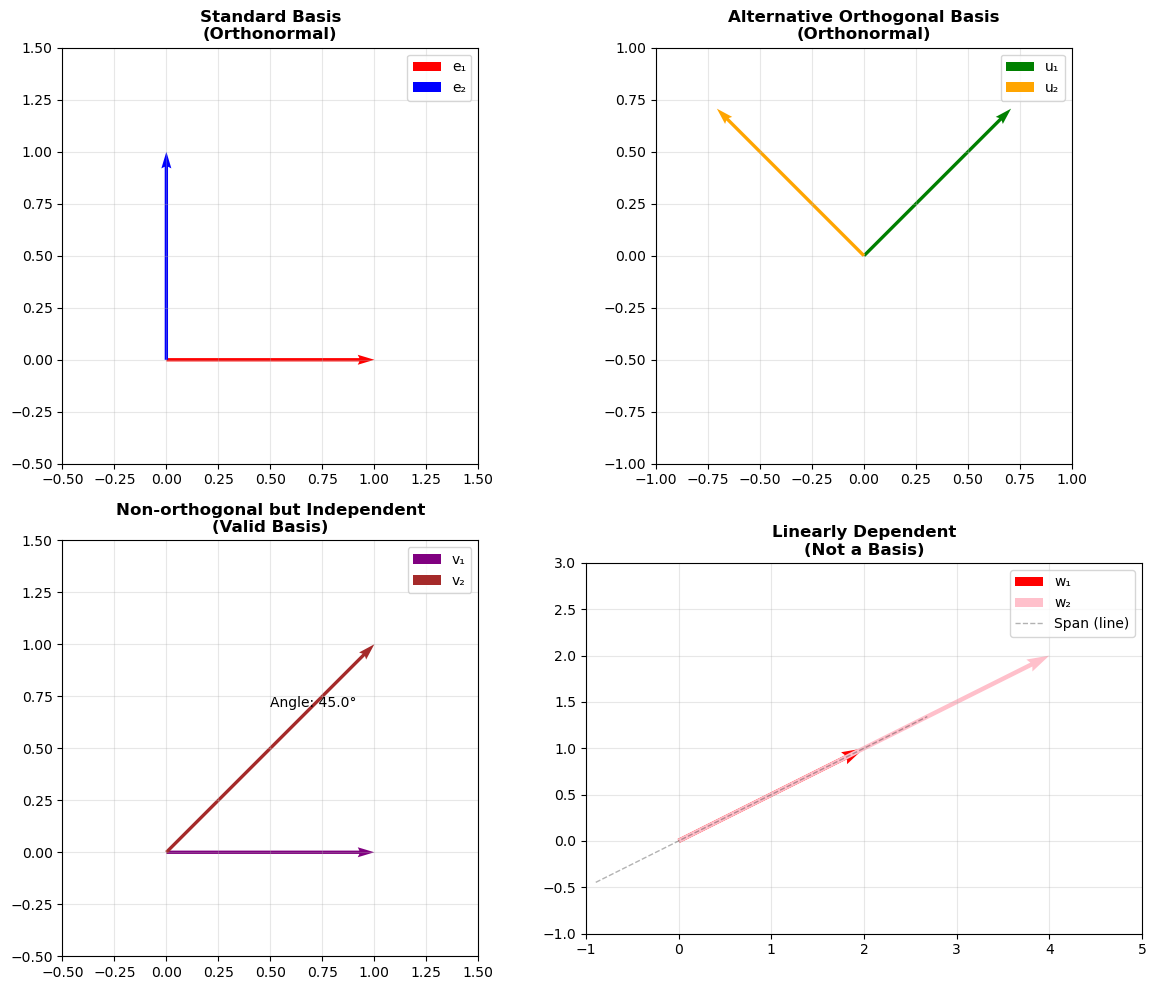


💡 Key Insights:
1. ✅ Orthogonal bases are easiest to work with
2. ✅ Non-orthogonal bases still work if independent
3. ❌ Dependent vectors waste space - they're redundant
4. ⚠️  More vectors than dimensions → guaranteed dependence
5. 🎯 Best basis = orthonormal (orthogonal + unit length)


In [7]:
# Function to check linear independence via rank
def check_independence(*vectors):
    matrix = np.stack(vectors, axis=1)
    rank = np.linalg.matrix_rank(matrix)
    print(f"Rank = {rank} (out of {len(vectors)} vectors)")
    if rank == len(vectors):
        print("✅ The vectors are linearly independent.")
    else:
        print("❌ The vectors are linearly dependent.")

# Comprehensive demonstration of independence checking and span analysis
print("=== Advanced Independence and Span Analysis ===")

def analyze_vector_set(vectors, labels=None):
    """
    Comprehensive analysis of a set of vectors.
    """
    if labels is None:
        labels = [f'v{i+1}' for i in range(len(vectors))]
    
    print(f"\n📊 Analyzing vector set: {labels}")
    
    # Display vectors
    for i, (vec, label) in enumerate(zip(vectors, labels)):
        print(f"  {label} = {vec}")
    
    # Check independence
    is_indep, info = check_linear_independence(vectors)
    
    # Get dimension from the first vector
    dimension = vectors[0].shape[0]
    spans_full_space = info['rank'] == dimension
    
    # Add dimension and spans_full_space to info dictionary
    info['dimension'] = dimension
    info['spans_full_space'] = spans_full_space
    
    print(f"\n🔍 Analysis Results:")
    print(f"  Matrix rank: {info['rank']}")
    print(f"  Number of vectors: {info['n_vectors']}")
    print(f"  Space dimension: {dimension}D")
    print(f"  Linear independence: {'✅ YES' if is_indep else '❌ NO'}")
    print(f"  Spans full space: {'✅ YES' if spans_full_space else '❌ NO'}")
    
    # Determine what they span
    if info['rank'] == 1:
        span_desc = "a LINE through the origin"
    elif info['rank'] == 2:
        span_desc = "a PLANE through the origin" 
    elif info['rank'] == dimension:
        span_desc = f"the entire {dimension}D space"
    else:
        span_desc = f"a {info['rank']}D subspace"
    
    print(f"  Geometric span: {span_desc}")
    
    # Check if they form a basis
    if is_indep and spans_full_space:
        print(f"  ⭐ These vectors form a BASIS for {dimension}D space!")
    elif is_indep:
        print(f"  💡 These vectors are independent but don't span the full space")
    else:
        print(f"  ⚠️  These vectors are dependent - at least one is redundant")
    
    return info

# Test Case 1: Standard basis (should be perfect)
print("="*60)
print("TEST CASE 1: Standard Basis")
e1 = np.array([1, 0])
e2 = np.array([0, 1])
info1 = analyze_vector_set([e1, e2], ['e₁', 'e₂'])

# Test Case 2: Alternative orthogonal basis
print("\n" + "="*60)
print("TEST CASE 2: Alternative Orthogonal Basis")
u1 = np.array([1, 1]) / np.sqrt(2)  # Normalized diagonal vector
u2 = np.array([-1, 1]) / np.sqrt(2)  # Normalized perpendicular vector
info2 = analyze_vector_set([u1, u2], ['u₁', 'u₂'])

# Test Case 3: Non-orthogonal but independent
print("\n" + "="*60)
print("TEST CASE 3: Non-orthogonal but Independent")
v1 = np.array([1, 0])
v2 = np.array([1, 1])  # Not orthogonal to v1, but independent
info3 = analyze_vector_set([v1, v2], ['v₁', 'v₂'])

# Test Case 4: Dependent vectors
print("\n" + "="*60)
print("TEST CASE 4: Linearly Dependent Vectors")
w1 = np.array([2, 1])
w2 = np.array([4, 2])  # w2 = 2 * w1
info4 = analyze_vector_set([w1, w2], ['w₁', 'w₂'])

# Test Case 5: Three vectors in 2D (over-complete)
print("\n" + "="*60)
print("TEST CASE 5: Three Vectors in 2D (Over-complete)")
z1 = np.array([1, 0])
z2 = np.array([0, 1])  
z3 = np.array([1, 1])  # Third vector in 2D space
info5 = analyze_vector_set([z1, z2, z3], ['z₁', 'z₂', 'z₃'])

# Visualize some of the cases
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

# Case 1: Standard basis
ax = axes[0]
plot_data = [(e1, 'e₁', 'red'), (e2, 'e₂', 'blue')]
for vec, label, color in plot_data:
    ax.quiver(0, 0, vec[0], vec[1], angles='xy', scale_units='xy', scale=1,
              color=color, width=0.008, label=label, linewidth=2)
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1.5)
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.legend()
ax.set_title("Standard Basis\n(Orthonormal)", fontweight='bold')

# Case 2: Alternative orthogonal basis
ax = axes[1]
plot_data = [(u1, 'u₁', 'green'), (u2, 'u₂', 'orange')]
for vec, label, color in plot_data:
    ax.quiver(0, 0, vec[0], vec[1], angles='xy', scale_units='xy', scale=1,
              color=color, width=0.008, label=label, linewidth=2)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.legend()
ax.set_title("Alternative Orthogonal Basis\n(Orthonormal)", fontweight='bold')

# Case 3: Non-orthogonal but independent
ax = axes[2]
plot_data = [(v1, 'v₁', 'purple'), (v2, 'v₂', 'brown')]
for vec, label, color in plot_data:
    ax.quiver(0, 0, vec[0], vec[1], angles='xy', scale_units='xy', scale=1,
              color=color, width=0.008, label=label, linewidth=2)
# Show the angle between them
angle = np.arccos(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))
ax.text(0.5, 0.7, f'Angle: {np.degrees(angle):.1f}°', fontsize=10)
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1.5)
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.legend()
ax.set_title("Non-orthogonal but Independent\n(Valid Basis)", fontweight='bold')

# Case 4: Dependent vectors  
ax = axes[3]
plot_data = [(w1, 'w₁', 'red'), (w2, 'w₂', 'pink')]
for vec, label, color in plot_data:
    ax.quiver(0, 0, vec[0], vec[1], angles='xy', scale_units='xy', scale=1,
              color=color, width=0.008, label=label, linewidth=2)
# Draw the line they span
t = np.linspace(-1, 3, 100)
line = np.outer(t, w1/np.linalg.norm(w1)**2 * np.linalg.norm(w1))
ax.plot(line[:, 0], line[:, 1], 'k--', alpha=0.3, linewidth=1, label='Span (line)')
ax.set_xlim(-1, 5)
ax.set_ylim(-1, 3)
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.legend()
ax.set_title("Linearly Dependent\n(Not a Basis)", fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n💡 Key Insights:")
print(f"1. ✅ Orthogonal bases are easiest to work with")
print(f"2. ✅ Non-orthogonal bases still work if independent")  
print(f"3. ❌ Dependent vectors waste space - they're redundant")
print(f"4. ⚠️  More vectors than dimensions → guaranteed dependence")
print(f"5. 🎯 Best basis = orthonormal (orthogonal + unit length)")


# 4. Practical Application: Understanding Data Structure

Let's see how these concepts apply to real data analysis scenarios.

=== Practical Application: Feature Independence in Data ===
🔬 Simulating different types of feature relationships:

1. INDEPENDENT FEATURES (Good for ML)
   Feature 1 vs Feature 2 correlation: -0.136
   Status: ✅ Independent

2. PERFECTLY DEPENDENT FEATURES (Redundant)
   Feature 1 vs Feature 3 correlation: 1.000
   Relationship: feature3 = 2×feature1 + 5
   Status: ❌ Perfectly Dependent

3. PARTIALLY CORRELATED FEATURES (Common in real data)
   Feature 1 vs Feature 4 correlation: 0.909
   Status: Other

🔍 Linear Independence Analysis (using sample data points):

Independent features:
   Vectors: ['[0.50, -0.14]', '[-1.42, -0.42]']
   Rank: 2/2
   Result: Independent ✅

Perfectly dependent features:
   Vectors: ['[0.50, -0.14]', '[5.99, 4.72]']
   Rank: 2/2
   Result: Independent ❌

Partially correlated features:
   Vectors: ['[0.50, -0.14]', '[0.46, 0.07]']
   Rank: 2/2
   Result: Independent ⚠️

Three features (one redundant):
   Vectors: ['[0.50, -0.14]', '[-1.42, -0.42]', '[5.99, 4

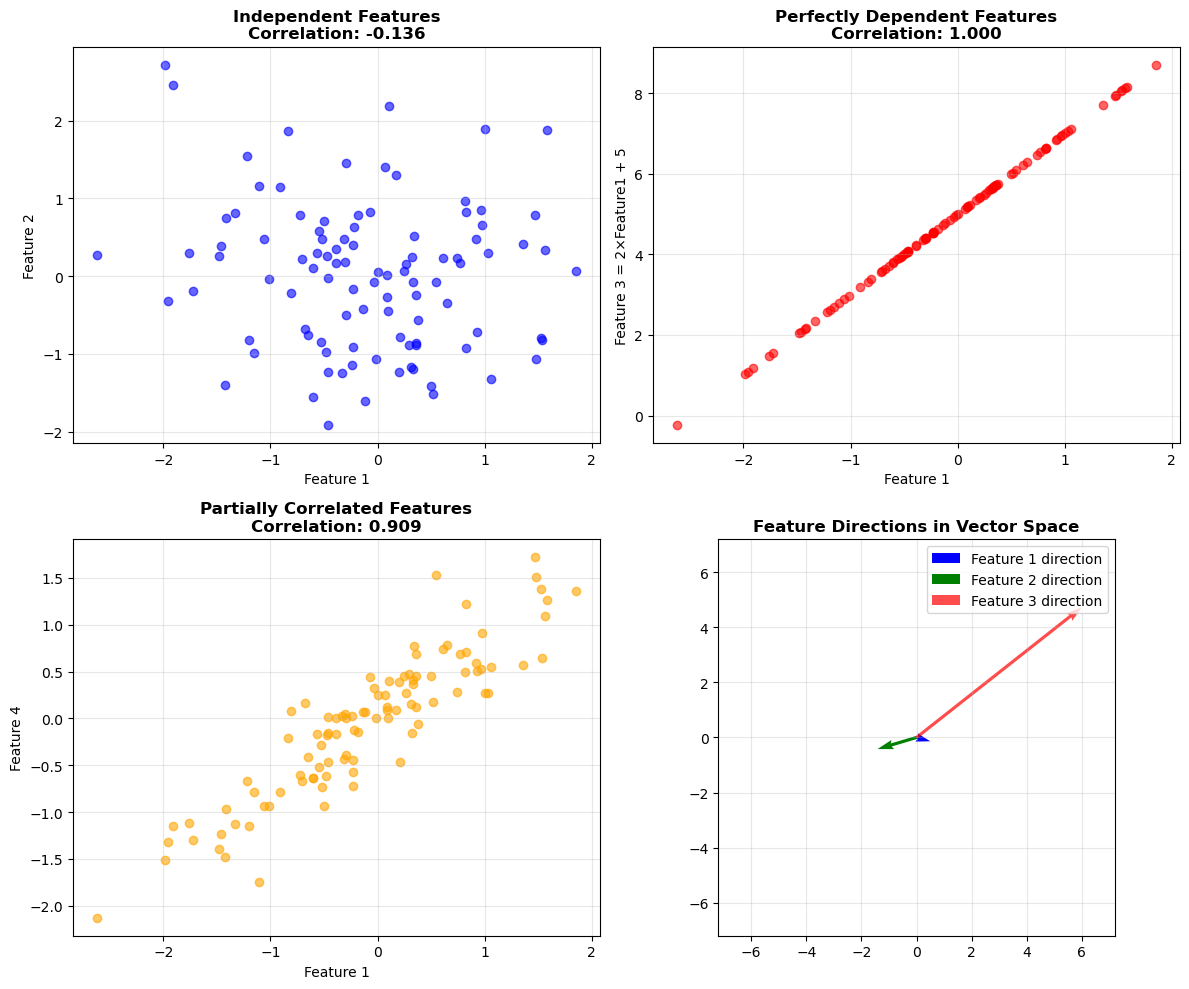


🎯 Machine Learning Implications:
✅ Independent features: Each provides unique information
❌ Dependent features: Redundant - can hurt model performance
⚠️  Correlated features: May indicate underlying relationships
💡 Feature selection: Remove dependent features to improve efficiency
🔧 Dimensionality reduction: PCA finds independent principal components

📊 Real-world Examples:
• Independent: Height vs Income (generally unrelated)
• Dependent: Temperature in °C vs °F (perfect linear relationship)
• Correlated: Education level vs Income (related but not perfectly)
• Redundant: Storing both area and diameter for circles


In [8]:
# Practical Application: Feature Analysis in Data Science
print("=== Practical Application: Feature Independence in Data ===")

# Simulate a dataset with different types of feature relationships
np.random.seed(42)

# Create synthetic data examples
print("🔬 Simulating different types of feature relationships:\n")

# Case 1: Independent features
print("1. INDEPENDENT FEATURES (Good for ML)")
feature1 = np.random.randn(100)  # Random noise
feature2 = np.random.randn(100)  # Different random noise

# Check correlation
correlation_indep = np.corrcoef(feature1, feature2)[0, 1]
print(f"   Feature 1 vs Feature 2 correlation: {correlation_indep:.3f}")
print(f"   Status: {'✅ Independent' if abs(correlation_indep) < 0.3 else '❌ Dependent'}")

# Case 2: Perfectly dependent features
print("\n2. PERFECTLY DEPENDENT FEATURES (Redundant)")
feature3 = feature1 * 2 + 5  # Linear transformation of feature1

correlation_dep = np.corrcoef(feature1, feature3)[0, 1]
print(f"   Feature 1 vs Feature 3 correlation: {correlation_dep:.3f}")
print(f"   Relationship: feature3 = 2×feature1 + 5")
print(f"   Status: {'✅ Independent' if abs(correlation_dep) < 0.9 else '❌ Perfectly Dependent'}")

# Case 3: Partially correlated features
print("\n3. PARTIALLY CORRELATED FEATURES (Common in real data)")
feature4 = 0.7 * feature1 + 0.3 * np.random.randn(100)  # Partial dependence

correlation_partial = np.corrcoef(feature1, feature4)[0, 1]
print(f"   Feature 1 vs Feature 4 correlation: {correlation_partial:.3f}")
print(f"   Status: {'⚠️ Partially dependent' if 0.3 < abs(correlation_partial) < 0.9 else 'Other'}")

# Analyze as vectors (using first 2 data points as example vectors)
print(f"\n🔍 Linear Independence Analysis (using sample data points):")

# Use the first few data points as example vectors
v1 = np.array([feature1[0], feature1[1]])  
v2 = np.array([feature2[0], feature2[1]])  # Independent
v3 = np.array([feature3[0], feature3[1]])  # Dependent on v1
v4 = np.array([feature4[0], feature4[1]])  # Partially dependent

# Test different combinations
test_cases = [
    ([v1, v2], "Independent features", "✅"),
    ([v1, v3], "Perfectly dependent features", "❌"), 
    ([v1, v4], "Partially correlated features", "⚠️"),
    ([v1, v2, v3], "Three features (one redundant)", "❌")
]

for vectors, description, expected in test_cases:
    is_indep, info = check_linear_independence(vectors)
    print(f"\n{description}:")
    print(f"   Vectors: {[f'[{v[0]:.2f}, {v[1]:.2f}]' for v in vectors]}")
    print(f"   Rank: {info['rank']}/{info['n_vectors']}")
    print(f"   Result: {'Independent' if is_indep else 'Dependent'} {expected}")

# Visualization of feature relationships
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Independent features
axes[0,0].scatter(feature1, feature2, alpha=0.6, color='blue')
axes[0,0].set_title(f"Independent Features\nCorrelation: {correlation_indep:.3f}", fontweight='bold')
axes[0,0].set_xlabel('Feature 1')
axes[0,0].set_ylabel('Feature 2')
axes[0,0].grid(True, alpha=0.3)

# Plot 2: Perfectly dependent features
axes[0,1].scatter(feature1, feature3, alpha=0.6, color='red')
axes[0,1].set_title(f"Perfectly Dependent Features\nCorrelation: {correlation_dep:.3f}", fontweight='bold')
axes[0,1].set_xlabel('Feature 1') 
axes[0,1].set_ylabel('Feature 3 = 2×Feature1 + 5')
axes[0,1].grid(True, alpha=0.3)

# Plot 3: Partially correlated features
axes[1,0].scatter(feature1, feature4, alpha=0.6, color='orange')
axes[1,0].set_title(f"Partially Correlated Features\nCorrelation: {correlation_partial:.3f}", fontweight='bold')
axes[1,0].set_xlabel('Feature 1')
axes[1,0].set_ylabel('Feature 4')
axes[1,0].grid(True, alpha=0.3)

# Plot 4: Feature space representation
axes[1,1].quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1,
                color='blue', width=0.008, label='Feature 1 direction', linewidth=2)
axes[1,1].quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1,
                color='green', width=0.008, label='Feature 2 direction', linewidth=2)
axes[1,1].quiver(0, 0, v3[0], v3[1], angles='xy', scale_units='xy', scale=1,
                color='red', width=0.008, label='Feature 3 direction', linewidth=2, alpha=0.7)
max_val = max(abs(v1).max(), abs(v2).max(), abs(v3).max()) * 1.2
axes[1,1].set_xlim(-max_val, max_val)
axes[1,1].set_ylim(-max_val, max_val)
axes[1,1].set_aspect('equal')
axes[1,1].grid(True, alpha=0.3)
axes[1,1].legend()
axes[1,1].set_title("Feature Directions in Vector Space", fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n🎯 Machine Learning Implications:")
print(f"✅ Independent features: Each provides unique information")
print(f"❌ Dependent features: Redundant - can hurt model performance")
print(f"⚠️  Correlated features: May indicate underlying relationships")
print(f"💡 Feature selection: Remove dependent features to improve efficiency")
print(f"🔧 Dimensionality reduction: PCA finds independent principal components")

print(f"\n📊 Real-world Examples:")
print(f"• Independent: Height vs Income (generally unrelated)")
print(f"• Dependent: Temperature in °C vs °F (perfect linear relationship)")  
print(f"• Correlated: Education level vs Income (related but not perfectly)")
print(f"• Redundant: Storing both area and diameter for circles")

---

# ✅ Comprehensive Summary

## Core Concepts Mastered

### 1. Vector Spaces
- **Definition**: Mathematical structure where vectors can be added and scaled
- **Properties**: Closed under addition and scalar multiplication
- **Examples**: 2D plane, 3D space, high-dimensional data spaces

### 2. Linear Independence
- **Mathematical test**: $c_1\vec{v}_1 + c_2\vec{v}_2 + ... + c_n\vec{v}_n = \vec{0}$ only when all $c_i = 0$
- **Intuitive meaning**: Each vector provides unique, non-redundant information
- **Geometric interpretation**: Vectors point in "different directions"

### 3. Span
- **Definition**: All possible linear combinations of a set of vectors
- **Geometric meaning**: The space you can "reach" using those vectors
- **Examples**: Line (1 vector), plane (2 independent vectors), full space (basis)

### 4. Basis
- **Requirements**: Linearly independent AND spans the entire space
- **Properties**: Minimal spanning set, unique representation of any vector
- **Types**: Standard, orthogonal, orthonormal

### 5. Dimensionality
- **Rule**: Dimension = maximum number of linearly independent vectors
- **Key insight**: Adding dependent vectors doesn't increase dimension

## Practical Decision Tree

```
Given a set of vectors, ask:

Are they linearly independent?
├─ YES: Good! They provide unique information
│   └─ Do they span the full space?
│       ├─ YES: ⭐ They form a BASIS
│       └─ NO: They span a subspace
│
└─ NO: ❌ At least one vector is redundant
    └─ Consider removing dependent vectors
```

## Applications in Machine Learning

| Concept | ML Application | Example |
|---------|---------------|---------|
| **Linear Independence** | Feature selection | Remove correlated features |
| **Basis** | Coordinate transformation | PCA principal components |
| **Span** | Feature space | All possible combinations of features |
| **Dimensionality** | Curse of dimensionality | High-dim data challenges |
| **Orthogonality** | Decorrelated features | Independent components analysis |

## Common Pitfalls to Avoid

1. **❌ Confusing correlation with dependence**: High correlation ≠ perfect dependence
2. **❌ Assuming orthogonality is required**: Independence is sufficient for basis
3. **❌ Ignoring numerical precision**: Use appropriate tolerances for rank calculations
4. **❌ Forgetting about redundancy**: More features ≠ better (if dependent)

## Key Mathematical Tools

- **Rank calculation**: `np.linalg.matrix_rank()` - determines independence
- **Correlation analysis**: `np.corrcoef()` - measures linear relationships  
- **Dot products**: Check orthogonality
- **Matrix operations**: Solve linear systems for general basis changes

## Next Steps

Now that you understand these foundations, you're ready for:
- **Eigendecomposition**: Finding natural bases for matrices
- **Principal Component Analysis**: Data-driven basis selection
- **Singular Value Decomposition**: Advanced matrix factorization
- **Linear transformations**: How matrices change coordinate systems

## Final Wisdom

> "The art of linear algebra is choosing the right basis for your problem. 
> A good basis makes hard problems easy, while a bad basis makes easy problems hard."

Understanding linear independence and basis isn't just mathematical theory—it's the foundation for making sense of data structure, feature relationships, and dimensional reduction in machine learning! 🚀


=== Interactive Exploration Section ===
Try modifying these examples to test your understanding!

🎯 CHALLENGE 1: Create Your Own Basis
Modify these vectors to create a valid basis for 2D:
Your vectors: v₁ = [1 2], v₂ = [3 1]
Independence test: ✅ PASS
Forms 2D basis: ✅ YES


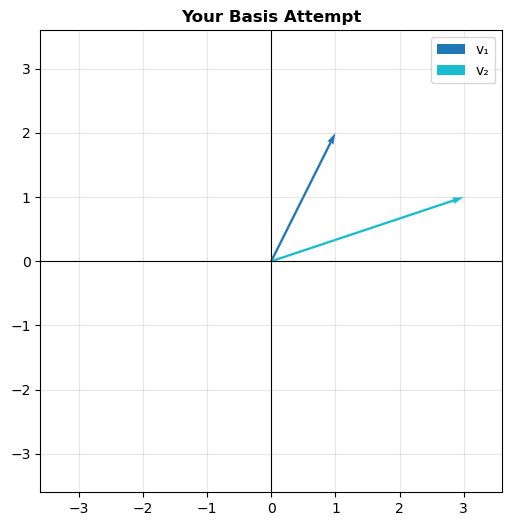


🎯 CHALLENGE 2: Predict Before Testing
Predict which sets are independent, then run the tests:

1. Standard basis: [1 0], [0 1]
   Your prediction (independent/dependent): ____

2. Diagonal vectors: [1 1], [-1  1]
   Your prediction (independent/dependent): ____

3. One is 2× the other: [2 4], [1 2]
   Your prediction (independent/dependent): ____

4. Random vectors: [1 3], [2 5]
   Your prediction (independent/dependent): ____

🎯 CHALLENGE 3: Fix the Dependent Set
These vectors are dependent. Modify ONE to make them independent:
Original: v₁ = [1 2], v₂ = [2 4]
Status: Dependent (needs fixing!)
Your fix: v₁ = [1 2], v₂ = [3 1]
Fixed status: ✅ SUCCESS!

💡 Exploration Tips:
• Try vectors that are multiples of each other (dependent)
• Try perpendicular vectors (independent and orthogonal)
• Try vectors with small angle between them (independent but not orthogonal)
• See what happens with 3 vectors in 2D space
• Experiment with vectors of different lengths

🚀 Advanced Challenges:
1. Find 

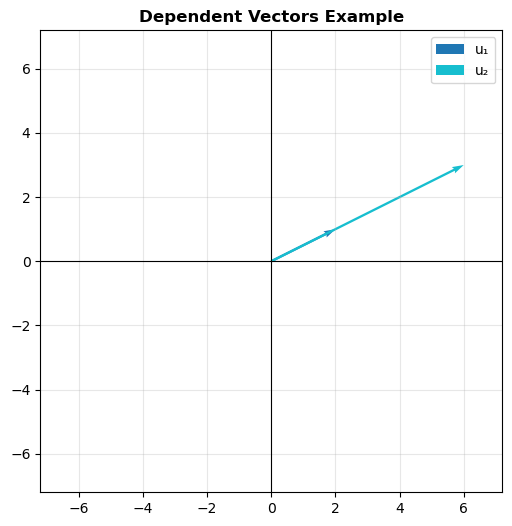


🎯 CHALLENGE 3: Orthogonal vs Non-orthogonal Bases
Orthogonal basis:
  Vectors: [1 0], [0 1]
  Dot product: 0 (should be 0)
Non-orthogonal basis:
  Vectors: [1 0], [1 1]
  Dot product: 1 (non-zero but still valid basis)
Orthogonal basis valid: ✅ YES
Non-orthogonal basis valid: ✅ YES


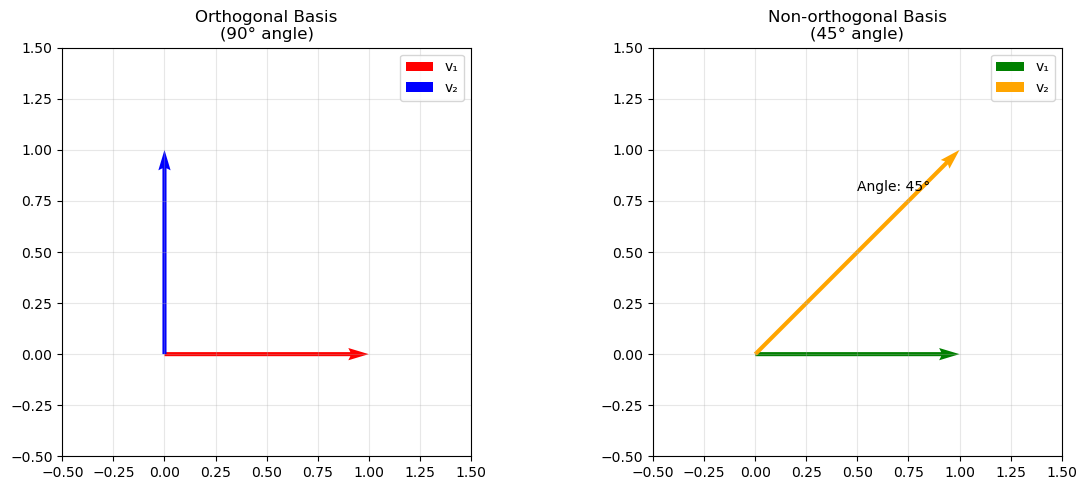


💡 Key Takeaway: Both bases work! Orthogonal is easier to work with, but not required.


In [13]:
# 🎮 Interactive Exploration: Test Your Understanding!

print("=== Interactive Exploration Section ===")
print("Try modifying these examples to test your understanding!\n")

# Challenge 1: Create your own basis
print("🎯 CHALLENGE 1: Create Your Own Basis")
print("Modify these vectors to create a valid basis for 2D:")

# Start with a simple example - you can modify these!
your_v1 = np.array([1, 2])    # Modify this!
your_v2 = np.array([3, 1])    # Modify this!

print(f"Your vectors: v₁ = {your_v1}, v₂ = {your_v2}")

# Test your vectors
is_indep, info = check_linear_independence([your_v1, your_v2])
spans_full_space = info['rank'] == 2  # Calculate locally for 2D space
print(f"Independence test: {'✅ PASS' if is_indep else '❌ FAIL'}")
print(f"Forms 2D basis: {'✅ YES' if is_indep and spans_full_space else '❌ NO'}")

# Visualize your attempt
plot_vectors([your_v1, your_v2], ['v₁', 'v₂'], title="Your Basis Attempt")

# Challenge 2: Predict independence
print(f"\n🎯 CHALLENGE 2: Predict Before Testing")
test_vectors = [
    (np.array([1, 0]), np.array([0, 1]), "Standard basis"),
    (np.array([1, 1]), np.array([-1, 1]), "Diagonal vectors"),
    (np.array([2, 4]), np.array([1, 2]), "One is 2× the other"),
    (np.array([1, 3]), np.array([2, 5]), "Random vectors"),
]

print("Predict which sets are independent, then run the tests:")
for i, (v1, v2, desc) in enumerate(test_vectors):
    print(f"\n{i+1}. {desc}: {v1}, {v2}")
    print("   Your prediction (independent/dependent): ____")
    
    # Uncomment the next line to see the answer:
    # is_indep, _ = check_linear_independence([v1, v2])
    # print(f"   Actual result: {'Independent' if is_indep else 'Dependent'}")

print(f"\n🎯 CHALLENGE 3: Fix the Dependent Set")
print("These vectors are dependent. Modify ONE to make them independent:")

broken_v1 = np.array([1, 2])
broken_v2 = np.array([2, 4])  # This is 2× the first vector!

print(f"Original: v₁ = {broken_v1}, v₂ = {broken_v2}")
is_indep, _ = check_linear_independence([broken_v1, broken_v2])
print(f"Status: {'Independent' if is_indep else 'Dependent (needs fixing!)'}")

# Your fix here:
fixed_v2 = np.array([3, 1])  # Replace this with your fix!

print(f"Your fix: v₁ = {broken_v1}, v₂ = {fixed_v2}")
is_indep_fixed, _ = check_linear_independence([broken_v1, fixed_v2])
print(f"Fixed status: {'✅ SUCCESS!' if is_indep_fixed else '❌ Still broken'}")

print(f"\n💡 Exploration Tips:")
print(f"• Try vectors that are multiples of each other (dependent)")
print(f"• Try perpendicular vectors (independent and orthogonal)")
print(f"• Try vectors with small angle between them (independent but not orthogonal)")
print(f"• See what happens with 3 vectors in 2D space")
print(f"• Experiment with vectors of different lengths")

print(f"\n🚀 Advanced Challenges:")
print(f"1. Find the angle between two independent vectors")
print(f"2. Create vectors that are independent but nearly dependent")  
print(f"3. Construct an orthonormal basis from any independent set")
print(f"4. Visualize the span of a single vector vs two independent vectors")

print("\n🎯 CHALLENGE 2: What Happens with Dependent Vectors?")
print("Try these dependent vectors:")

# Dependent example
dep_v1 = np.array([2, 1])
dep_v2 = np.array([6, 3])  # This is 3 * dep_v1

print(f"Dependent vectors: u₁ = {dep_v1}, u₂ = {dep_v2}")

is_indep_dep, info_dep = check_linear_independence([dep_v1, dep_v2])
spans_full_space_dep = info_dep['rank'] == 2
print(f"Independence test: {'✅ PASS' if is_indep_dep else '❌ FAIL'}")
print(f"Forms 2D basis: {'✅ YES' if is_indep_dep and spans_full_space_dep else '❌ NO'}")
print(f"Rank: {info_dep['rank']}/2 (shows linear dependence)")

# Visualize dependent vectors
plot_vectors([dep_v1, dep_v2], ['u₁', 'u₂'], title="Dependent Vectors Example")

print("\n🎯 CHALLENGE 3: Orthogonal vs Non-orthogonal Bases")

# Orthogonal basis
ortho_v1 = np.array([1, 0])
ortho_v2 = np.array([0, 1])

# Non-orthogonal but independent basis  
non_ortho_v1 = np.array([1, 0])
non_ortho_v2 = np.array([1, 1])

print("Orthogonal basis:")
print(f"  Vectors: {ortho_v1}, {ortho_v2}")
print(f"  Dot product: {np.dot(ortho_v1, ortho_v2)} (should be 0)")

print("Non-orthogonal basis:")
print(f"  Vectors: {non_ortho_v1}, {non_ortho_v2}")
print(f"  Dot product: {np.dot(non_ortho_v1, non_ortho_v2)} (non-zero but still valid basis)")

# Test both
is_indep_ortho, info_ortho = check_linear_independence([ortho_v1, ortho_v2])
is_indep_non_ortho, info_non_ortho = check_linear_independence([non_ortho_v1, non_ortho_v2])

print(f"Orthogonal basis valid: {'✅ YES' if is_indep_ortho else '❌ NO'}")
print(f"Non-orthogonal basis valid: {'✅ YES' if is_indep_non_ortho else '❌ NO'}")

# Compare visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Orthogonal
ax1.quiver(0, 0, ortho_v1[0], ortho_v1[1], angles='xy', scale_units='xy', scale=1, 
           color='red', width=0.01, label='v₁')
ax1.quiver(0, 0, ortho_v2[0], ortho_v2[1], angles='xy', scale_units='xy', scale=1, 
           color='blue', width=0.01, label='v₂')
ax1.set_xlim(-0.5, 1.5)
ax1.set_ylim(-0.5, 1.5)
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_title("Orthogonal Basis\n(90° angle)")

# Non-orthogonal
ax2.quiver(0, 0, non_ortho_v1[0], non_ortho_v1[1], angles='xy', scale_units='xy', scale=1, 
           color='green', width=0.01, label='v₁')
ax2.quiver(0, 0, non_ortho_v2[0], non_ortho_v2[1], angles='xy', scale_units='xy', scale=1, 
           color='orange', width=0.01, label='v₂')

# Show angle
angle = np.arccos(np.dot(non_ortho_v1, non_ortho_v2) / 
                  (np.linalg.norm(non_ortho_v1) * np.linalg.norm(non_ortho_v2)))
ax2.text(0.5, 0.8, f'Angle: {np.degrees(angle):.0f}°', fontsize=10)

ax2.set_xlim(-0.5, 1.5)
ax2.set_ylim(-0.5, 1.5)
ax2.set_aspect('equal')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.set_title("Non-orthogonal Basis\n(45° angle)")

plt.tight_layout()
plt.show()

print("\n💡 Key Takeaway: Both bases work! Orthogonal is easier to work with, but not required.")

## Summary

This notebook provided a comprehensive introduction to the fundamental concepts of linear algebra that form the foundation for machine learning and data analysis.

### Key Concepts Covered

**Vector Spaces**
- Mathematical structures where vectors can be added and scaled
- Follow specific algebraic rules including associativity and commutativity
- Serve as the "universe" where vectors exist and can be combined

**Linear Independence**
- Mathematical test: vectors are independent if only the trivial solution exists for their linear combination equaling zero
- Geometric interpretation: vectors point in sufficiently different directions
- Each independent vector provides unique, non-redundant information

**Span**
- The set of all possible linear combinations of given vectors
- Represents the space that can be "reached" using those vectors
- Ranges from lines (1 vector) to planes (2 independent vectors) to full spaces

**Basis**
- A set of vectors that are both linearly independent and span the entire space
- Provides the minimal spanning set for a vector space
- Enables unique representation of any vector through coordinates
- Examples include standard basis, orthogonal basis, and orthonormal basis

**Dimensionality**
- Determined by the maximum number of linearly independent vectors in a space
- Adding dependent vectors does not increase the dimension
- Critical for understanding data structure and complexity

### Practical Applications

The notebook demonstrated how these theoretical concepts apply to real-world scenarios:

- Feature selection in machine learning datasets
- Identifying redundant vs. informative data features
- Understanding correlation vs. linear dependence
- Dimensionality reduction techniques
- Principal Component Analysis foundations

### Mathematical Tools and Methods

- Matrix rank calculation for determining independence
- Correlation analysis for measuring linear relationships
- Visualization techniques for understanding vector relationships
- Systematic analysis of vector sets and their properties

### Implementation and Verification

The notebook included comprehensive code examples showing:
- How to test linear independence programmatically
- Visualization of different types of vector relationships
- Analysis of real and synthetic datasets
- Interactive examples for hands-on learning

This foundation prepares for advanced topics including eigendecomposition, principal component analysis, and singular value decomposition.